<h1 align="center">Assignment No :- 02</h1> 

Title :- Plot the Normal Distribution for class test result of a particular subject. Identify the
Skewness and Kurtosis

# Plotting Normal Distribution

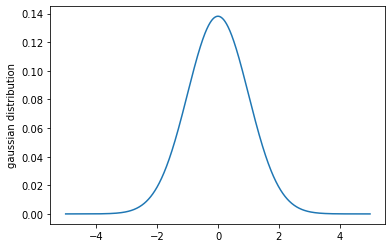

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import statistics
  
x = np.arange(-5,5,.01)
  
# Calculating mean and standard deviation
mean = statistics.mean(x)
sd = statistics.stdev(x)
variance = np.square(sd)

f = np.exp(-0.5*np.square(x-mean/sd))/(sd*np.sqrt(2*np.pi))

plt.plot(x,f)
plt.ylabel('gaussian distribution')
plt.show()

Using Scipy module

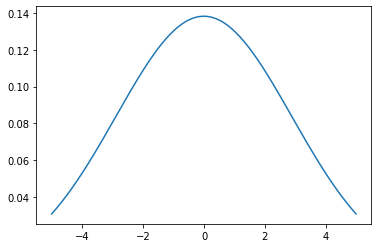

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
  
# Plot between -10 and 10 with .001 steps.
x_axis = np.arange(-5,5,.01)
  
# Calculating mean and standard deviation
mean = statistics.mean(x_axis)
sd = statistics.stdev(x_axis)
  
plt.plot(x_axis, norm.pdf(x_axis, mean, sd))
plt.show()

# Lab 2

Plotting Normal distribution of Test Results for Science subject

In [9]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
from scipy.stats import kurtosis, skew, norm

# loading the dataset
df= pd.read_csv('results.csv',index_col=0,dtype=float) # index_col=0 takes 1st column from dataset as index
df.describe()

,Hindi,English,Science,Maths,History,Geograpgy,Total,Results,Div
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,51.645000,50.110000,49.440000,49.553000,49.03400,50.028000,299.810000,0.350000,1.856000
std,29.471912,28.048505,28.921114,28.632447,28.76975,28.710268,71.865239,0.477208,0.904479
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,103.000000,0.000000,0.000000
25%,26.000000,26.000000,25.000000,25.750000,24.00000,26.000000,254.000000,0.000000,1.000000
50%,53.000000,50.500000,50.000000,49.000000,49.00000,49.000000,296.000000,0.000000,2.000000
75%,77.000000,75.000000,73.250000,74.000000,73.25000,75.000000,349.250000,1.000000,3.000000
max,99.000000,99.000000,99.000000,99.000000,99.00000,99.000000,505.000000,1.000000,3.000000


Mean: 49.44
Std Dev: 28.921113927904486
Variance: 836.4308308308308


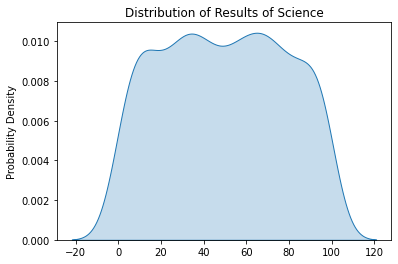

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statistics

sub = np.array(df['Science'])   # loading entries of Science subject into sub

#print(x)  
# Calculating mean and standard deviation
mn = statistics.mean(sub)
std = statistics.stdev(sub)
variance = np.square(std)

print("Mean:", mn)
print("Std Dev:", std)
print("Variance:", variance)

#f = np.exp(-0.5*np.square(x-mn/std))/(std*np.sqrt(2*np.pi))

#plt.plot(x,f)
'''
plt.plot(sub,norm.pdf(sub,mn,std))   # from scipy.stats we use norm.pdf
plt.xlim([-50, 150])
plt.ylim([0, 0.02])
plt.title('Normal distribution')
'''
plt.title('Distribution of Results of Science')
sns.kdeplot(sub,shade=True)     # kernel density estimation
#sns.kdeplot(df['Maths'])
#plt.xlabel('Science Marks')
plt.ylabel('Probability Density')
plt.show()



Skewness and Kurtosis with pandas

In [11]:
#calculation skewness and kurtosis for Maths subject
ku = df['Science'].kurt()
print("Kurtosis for Science: ",ku)
sk = df['Science'].skew()
print("Skewness for Science: ",sk)

Kurtosis for Science:  -1.178566396468201
Skewness for Science:  0.008994125306680551


Skewness and Kurtosis with scipy.stats

In [12]:
print("Kurtosis for Science: ",kurtosis(df['Science'],bias=False))   # False bias --> Sample Kurtosis
print("Skewness for Science: ",skew(df['Science'],bias=False))


Kurtosis for Science:  -1.178566396468201
Skewness for Science:  0.008994125306680551


IMPLEMENTING THE FORMULA

In [13]:
from math import sqrt
n= len(sub)   # count of students

def moment(data, k):       # calculates kth moment for data
  data_mean = sum(data)/len(data)
  return sum((d-data_mean)**k for d in data)/len(data)

def skw(data):            # uses moment fn to find population skewness
  return moment(data, 3)/(moment(data, 2)**1.5)

def kurto(data):
  return moment(data,4)/(moment(data, 2)**2)

print("Popluation Skewness of Science:",skw(sub))
print("Population Kurtosis of Science:",kurto(sub))
print("\n")

g2 = kurto(sub)-3       # excess kurtosis
print("Sample Skewness of Science:",skw(sub)*(sqrt(n*(n-1))/(n-2))) #Sample Skewness:  0.008994125306680551
print("Population Excess Kurtosis of Science:",g2) # From library fn Kurtosis for Science:  -1.178566396468201
print("Sample Excess Kurtosis of Science:",(6+g2*(n+1))*((n-1)/((n-2)*(n-3)))) 

Popluation Skewness of Science: 0.008980628493454167
Population Kurtosis of Science: 1.8213241854399451


Sample Skewness of Science: 0.0089941253066806
Population Excess Kurtosis of Science: -1.1786758145600549
Sample Excess Kurtosis of Science: -1.1785663964682025


# Conclusion
Since both Population and Sample Skewness is very low, data is almost Symmetrical (Very Slightly Right Skewed).

Since both Population and Sample Excess Kurtosis is -ve, data distribution is short-tailed (Platykurtic) 